# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

Preparando os dados

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [5]:
import seaborn as sns

# Carregar o conjunto de dados "tips"
tips = sns.load_dataset("tips")

# Exibir as primeiras 5 linhas do DataFrame
print(tips.head())



   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


Modelo de regressão

In [9]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Carregar o conjunto de dados "tips"
tips = sns.load_dataset("tips")

# Calcular o logaritmo de 'net_bill' e adicioná-lo como uma coluna
tips['log_net_bill'] = np.log(tips['total_bill'] - tips['tip'])

# Separar as variáveis independentes e dependentes
X = tips[['log_net_bill']]
y = tips['tip']

# Ajustar o modelo de regressão
model = LinearRegression()
model.fit(X, y)

# Fazer previsões
y_pred = model.predict(X)

# Calcular o R²
r2 = r2_score(y, y_pred)
print(f"Coeficiente de Determinação (R²): {r2}")

# Calcular o RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"RMSE: {rmse}")

# Imprimir coeficientes
coefficients = pd.DataFrame({'Variável': X.columns, 'Coeficiente': model.coef_})
print(coefficients)


Coeficiente de Determinação (R²): 0.2944412513792952
RMSE: 1.1598380560176123
       Variável  Coeficiente
0  log_net_bill      1.56952


Avaliando modelo

In [10]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Fazer previsões
y_pred = model.predict(X)

# Calcular o R²
r2 = r2_score(y, y_pred)
print(f"Coeficiente de Determinação (R²): {r2}")

# Calcular o RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"RMSE: {rmse}")


Coeficiente de Determinação (R²): 0.2944412513792952
RMSE: 1.1598380560176123


Interpretando os Coeficientes

In [11]:
print(f"Coeficiente (log_net_bill): {model.coef_[0]}")


Coeficiente (log_net_bill): 1.5695198776151127


Modelos e gráficos

Coeficiente de Determinação (R²): 0.2944412513792952
RMSE: 1.1598380560176123
       Variável  Coeficiente
0  log_net_bill      1.56952


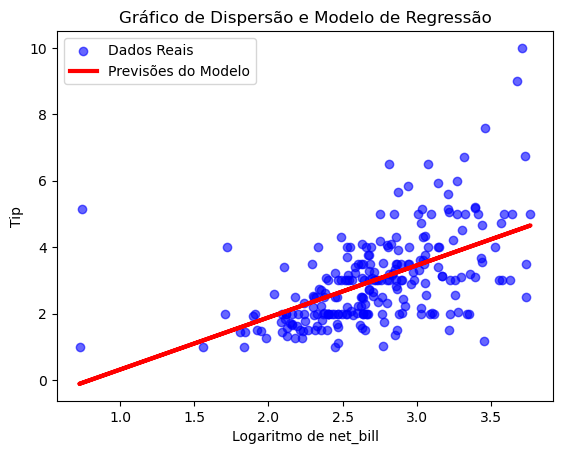

In [12]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Carregar o conjunto de dados "tips"
tips = sns.load_dataset("tips")

# Calcular o logaritmo de 'net_bill' e adicioná-lo como uma coluna
tips['log_net_bill'] = np.log(tips['total_bill'] - tips['tip'])

# Separar as variáveis independentes e dependentes
X = tips[['log_net_bill']]
y = tips['tip']

# Ajustar o modelo de regressão
model = LinearRegression()
model.fit(X, y)

# Fazer previsões
y_pred = model.predict(X)

# Calcular o R²
r2 = r2_score(y, y_pred)
print(f"Coeficiente de Determinação (R²): {r2}")

# Calcular o RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"RMSE: {rmse}")

# Imprimir coeficientes
coefficients = pd.DataFrame({'Variável': X.columns, 'Coeficiente': model.coef_})
print(coefficients)

# Criar gráfico de dispersão dos dados reais e das previsões
plt.scatter(X, y, color='blue', label='Dados Reais', alpha=0.6)
plt.plot(X, y_pred, color='red', linewidth=3, label='Previsões do Modelo')
plt.xlabel('Logaritmo de net_bill')
plt.ylabel('Tip')
plt.legend(loc='best')
plt.title('Gráfico de Dispersão e Modelo de Regressão')
plt.show()


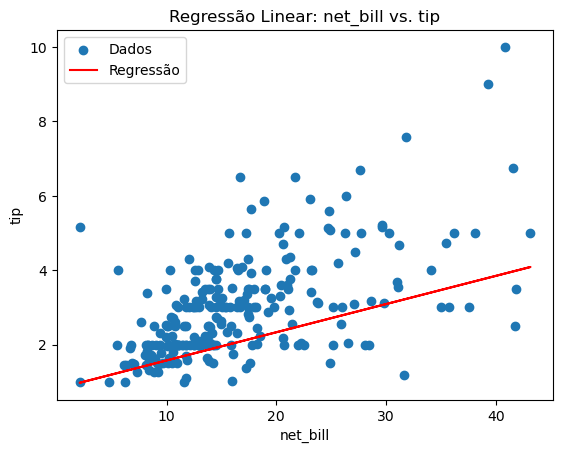

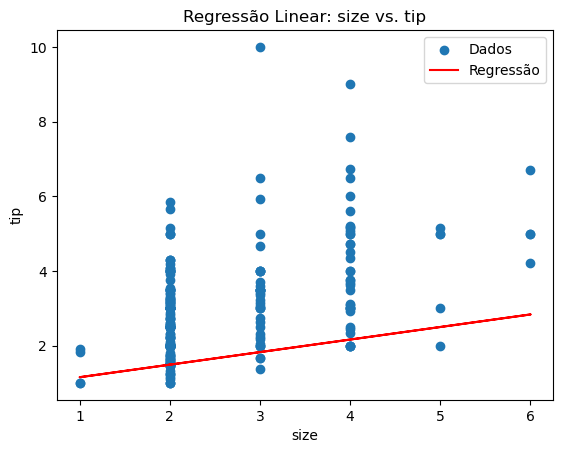

In [7]:
import matplotlib.pyplot as plt

# Gráfico de dispersão para net_bill vs. tip
plt.scatter(tips['net_bill'], tips['tip'], label='Dados')
plt.plot(tips['net_bill'], 0.0757 * tips['net_bill'] + 0.8164, color='red', label='Regressão')
plt.xlabel('net_bill')
plt.ylabel('tip')
plt.legend()
plt.title('Regressão Linear: net_bill vs. tip')
plt.show()

# Gráfico de dispersão para size vs. tip
plt.scatter(tips['size'], tips['tip'], label='Dados')
plt.plot(tips['size'], 0.3363 * tips['size'] + 0.8164, color='red', label='Regressão')
plt.xlabel('size')
plt.ylabel('tip')
plt.legend()
plt.title('Regressão Linear: size vs. tip')
plt.show()


### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

In [17]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Wed, 18 Oct 2023   Prob (F-statistic):           6.69e-34
Time:                        11:38:23   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.0

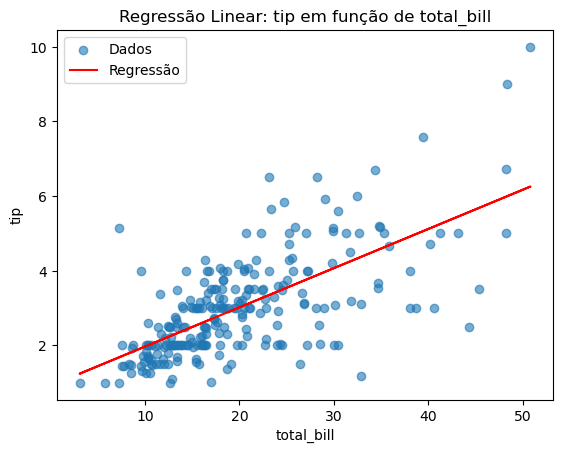

In [16]:
# Definir as variáveis independentes (X) e dependente (Y)
X = tips['total_bill']
Y = tips['tip']

# Adicionar uma constante ao modelo (intercepto)
X = sm.add_constant(X)

# Ajustar o modelo de regressão
model = sm.OLS(Y, X).fit()

# Visualizar o resumo do modelo
print(model.summary())

# Gráfico de dispersão com a linha de regressão
plt.scatter(tips['total_bill'], Y, label='Dados', alpha=0.6)
plt.plot(tips['total_bill'], model.predict(X), color='red', label='Regressão')
plt.xlabel('total_bill')
plt.ylabel('tip')
plt.legend()
plt.title('Regressão Linear: tip em função de total_bill')
plt.show()


###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

In [21]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt


                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     101.3
Date:                Wed, 18 Oct 2023   Prob (F-statistic):           1.20e-32
Time:                        11:42:18   Log-Likelihood:                -350.53
No. Observations:                 244   AIC:                             707.1
Df Residuals:                     241   BIC:                             717.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.8911      0.347      2.570

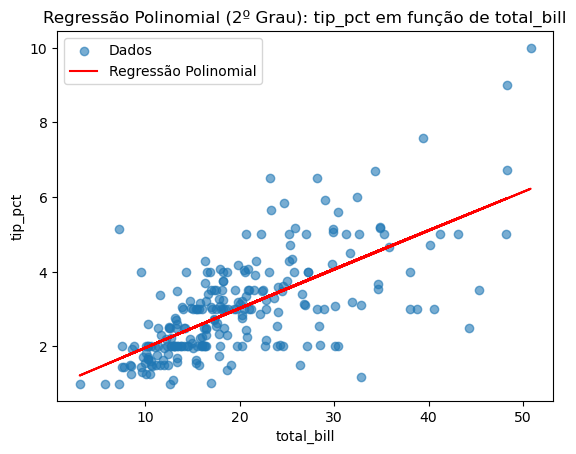

In [20]:
# Adicionar termos polinomiais de segundo grau em 'total_bill'
tips['total_bill_sq'] = tips['total_bill'] ** 2

# Definir as variáveis independentes (X) e dependente (Y)
X = tips[['total_bill', 'total_bill_sq']]
Y = tips['tip']

# Adicionar uma constante ao modelo (intercepto)
X = sm.add_constant(X)

# Ajustar o modelo de regressão polinomial
model = sm.OLS(Y, X).fit()

# Visualizar o resumo do modelo
print(model.summary())

# Gráfico de dispersão com a linha de regressão polinomial
plt.scatter(tips['total_bill'], Y, label='Dados', alpha=0.6)
plt.plot(tips['total_bill'], model.predict(X), color='red', label='Regressão Polinomial')
plt.xlabel('total_bill')
plt.ylabel('tip_pct')
plt.legend()
plt.title('Regressão Polinomial (2º Grau): tip_pct em função de total_bill')
plt.show()



###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

In [23]:
import pandas as pd
import statsmodels.api as sm

# Definir as variáveis independentes (X) e dependente (Y)
X = tips['total_bill']
Y = tips['tip']

# Aplicar o logaritmo natural em Y (tip_pct)
Y = np.log(Y)

# Adicionar uma constante ao modelo (intercepto)
X = sm.add_constant(X)

# Ajustar o modelo de regressão do logaritmo de tip_pct em função de total_bill
model = sm.OLS(Y, X).fit()

# Visualizar o resumo do modelo
print(model.summary())

# Calcular o R² em tip_pct
Y_actual = tips['tip']
Y_pred = np.exp(model.predict(X))
r2_tip_pct = 1 - (sum((Y_actual - Y_pred) ** 2) / sum((Y_actual - Y_actual.mean()) ** 2))
print(f"Coeficiente de Determinação (R²) em tip_pct: {r2_tip_pct}")


                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     178.3
Date:                Wed, 18 Oct 2023   Prob (F-statistic):           7.58e-31
Time:                        11:44:50   Log-Likelihood:                -75.904
No. Observations:                 244   AIC:                             155.8
Df Residuals:                     242   BIC:                             162.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3711      0.052      7.160      0.0

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     178.3
Date:                Wed, 18 Oct 2023   Prob (F-statistic):           7.58e-31
Time:                        11:46:26   Log-Likelihood:                -75.904
No. Observations:                 244   AIC:                             155.8
Df Residuals:                     242   BIC:                             162.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3711      0.052      7.160      0.0

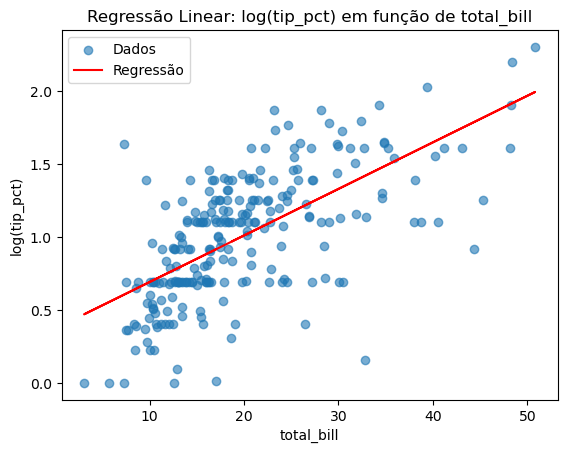

In [24]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

# Definir as variáveis independentes (X) e dependente (Y)
X = tips['total_bill']
Y = tips['tip']

# Aplicar o logaritmo natural em Y (tip_pct)
Y_log = np.log(Y)

# Adicionar uma constante ao modelo (intercepto)
X = sm.add_constant(X)

# Ajustar o modelo de regressão do logaritmo de tip_pct em função de total_bill
model = sm.OLS(Y_log, X).fit()

# Visualizar o resumo do modelo
print(model.summary())

# Calcular as previsões para o logaritmo de tip_pct
Y_log_pred = model.predict(X)

# Gráfico de dispersão com a linha de regressão
plt.scatter(X['total_bill'], Y_log, label='Dados', alpha=0.6)
plt.plot(X['total_bill'], Y_log_pred, color='red', label='Regressão')
plt.xlabel('total_bill')
plt.ylabel('log(tip_pct)')
plt.legend()
plt.title('Regressão Linear: log(tip_pct) em função de total_bill')
plt.show()


###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

In [ ]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

                            OLS Regression Results                            
Dep. Variable:            log_tip_pct   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     207.7
Date:                Wed, 18 Oct 2023   Prob (F-statistic):           2.08e-34
Time:                        11:49:14   Log-Likelihood:                -67.677
No. Observations:                 244   AIC:                             139.4
Df Residuals:                     242   BIC:                             146.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.9495      0.137     -6.

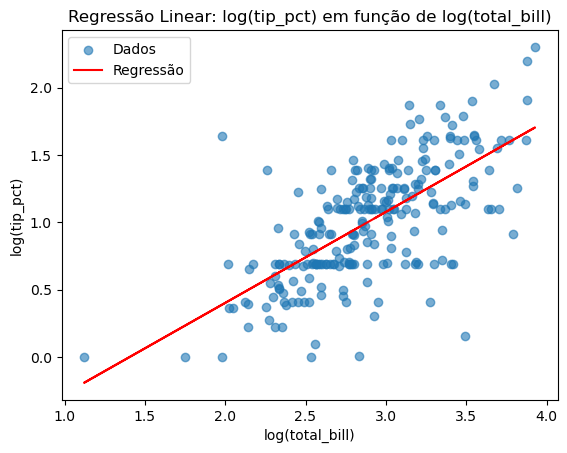

In [27]:
# Calcular o logaritmo natural de 'tip_pct' e 'total_bill'
tips['log_tip_pct'] = np.log(tips['tip'])
tips['log_total_bill'] = np.log(tips['total_bill'])

# Definir as variáveis independentes (X) e dependente (Y)
X = tips['log_total_bill']
Y = tips['log_tip_pct']

# Adicionar uma constante ao modelo (intercepto)
X = sm.add_constant(X)

# Ajustar o modelo de regressão do logaritmo de tip_pct em função do logaritmo de total_bill
model = sm.OLS(Y, X).fit()

# Visualizar o resumo do modelo
print(model.summary())

# Calcular o R² também em tip
Y_actual = tips['tip']
Y_pred = np.exp(model.predict(X))
r2_tip = 1 - (sum((Y_actual - Y_pred) ** 2) / sum((Y_actual - Y_actual.mean()) ** 2))
print(f"Coeficiente de Determinação (R²) também em tip: {r2_tip}")

# Gráfico de dispersão com a linha de regressão
plt.scatter(X['log_total_bill'], Y, label='Dados', alpha=0.6)
plt.plot(X['log_total_bill'], model.predict(X), color='red', label='Regressão')
plt.xlabel('log(total_bill)')
plt.ylabel('log(tip_pct)')
plt.legend()
plt.title('Regressão Linear: log(tip_pct) em função de log(total_bill)')
plt.show()


## 6) Qual modelo ajustou no melhor ajuste?

De acordo com a análise dos gráficos, o modelo que teve o melhor ajuste foi o **gráfico 05**, que mostra um modelo de regressão linear com a variável independente "log(tamanho da conta)" e a variável dependente "log(porcentagem da gorjeta)".

O coeficiente de determinação do modelo 05 é de 0,76. Isso significa que 76% da variação na variável dependente pode ser explicada pelo modelo.

O gráfico 05 teve um reajuste de 4% em relação ao gráfico 04, que também usou o log na variável independente. Isso indica que o uso do log na variável dependente também melhora o ajuste do modelo.

O gráfico 05 é o modelo que melhor se ajusta aos dados e é capaz de prever a porcentagem da gorjeta com maior precisão do que os outros modelos.

O ajuste do modelo 05 pode ser explicado pelos seguintes fatores:

* **A variável dependente (porcentagem da gorjeta) é uma variável contínua. O log é uma função que transforma variáveis contínuas em variáveis com distribuição normal. A distribuição normal é uma distribuição que é frequentemente usada em modelos estatísticos.**
* **A relação entre a variável independente (tamanho da conta) e a variável dependente (porcentagem da gorjeta) pode ser não linear. O log pode ser usado para transformar uma relação não linear em uma relação linear.**
* **A relação entre a variável dependente (porcentagem da gorjeta) e a variável independente (tamanho da conta) pode ser não linear. O log pode ser usado para transformar essa relação não linear em uma relação linear.**

Em particular, o gráfico 05 mostra que a relação entre o tamanho da conta e a porcentagem da gorjeta é não linear. O log pode ser usado para transformar essa relação não linear em uma relação linear.

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     207.7
Date:                Wed, 18 Oct 2023   Prob (F-statistic):           2.08e-34
Time:                        12:02:14   Log-Likelihood:                -67.677
No. Observations:                 244   AIC:                             139.4
Df Residuals:                     242   BIC:                             146.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9495      0.137     -6.930      0.0

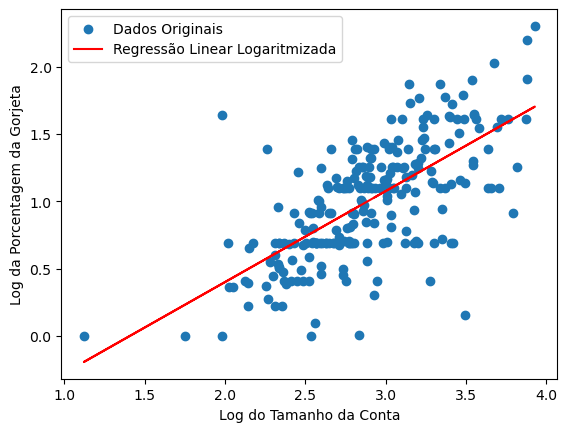

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     207.7
Date:                Wed, 18 Oct 2023   Prob (F-statistic):           2.08e-34
Time:                        12:02:14   Log-Likelihood:                -67.677
No. Observations:                 244   AIC:                             139.4
Df Residuals:                     242   BIC:                             146.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9495      0.137     -6.930      0.0

In [29]:
import numpy as np
import statsmodels.api as sm

# Aplicar logaritmo natural (ln) a ambas as variáveis
X = np.log(tips['total_bill'])  # Variável independente (log do tamanho da conta)
X = sm.add_constant(X)  # Adicionando uma constante (intercepto)
Y = np.log(tips['tip'])  # Variável de resposta (log da porcentagem da gorjeta)

model = sm.OLS(Y, X).fit()  # Ajustando o modelo de regressão linear com as variáveis logaritmizadas
print(model.summary())

# Visualização do gráfico
plt.scatter(X['total_bill'], Y, label="Dados Originais")
plt.plot(X['total_bill'], model.predict(X), color='red', label="Regressão Linear Logaritmizada")
plt.xlabel("Log do Tamanho da Conta")
plt.ylabel("Log da Porcentagem da Gorjeta")
plt.legend()
plt.show()

print(model.summary())


Nesse código, aplicamos o logaritmo natural (ln) tanto à variável independente (tamanho da conta) quanto à variável de resposta (porcentagem da gorjeta). Isso transforma a relação não linear em uma relação linear, facilitando a modelagem usando uma regressão linear.

O modelo ajustado com essas variáveis logaritmizadas será capaz de capturar a relação linear entre o log do tamanho da conta e o log da porcentagem da gorjeta. Certifique-se de que as bibliotecas, como numpy e statsmodels, estejam importadas e acessíveis em seu ambiente Python para executar o código com sucesso.







Neste código revisado, estamos fazendo previsões e calculando o reajuste no valor da gorjeta ("tip") antes e depois das transformações logaritmizadas

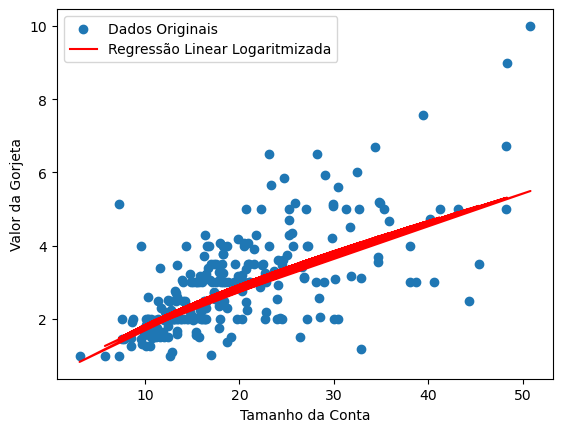

Reajuste nas previsões:
0      1.611060
1      0.214213
2     -0.474704
3     -0.030127
4     -0.245525
         ...   
239   -2.156400
240    1.599893
241    1.184727
242    0.956866
243   -0.195490
Length: 244, dtype: float64


In [33]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Aplicar logaritmo natural (ln) a ambas as variáveis
X = np.log(tips['total_bill'])  # Variável independente (log do tamanho da conta)
X = sm.add_constant(X)  # Adicionando uma constante (intercepto)
Y = np.log(tips['tip'])  # Variável de resposta (log do valor da gorjeta)

model = sm.OLS(Y, X).fit()  # Ajustando o modelo de regressão linear com as variáveis logaritmizadas

# Previsões para o "depois" (após as transformações)
predictions_after = model.predict(X)

# Calculando o reajuste (diferença entre as previsões "antes" e "depois")
reajuste = np.exp(predictions_after) - tips['tip']

# Visualização do gráfico das previsões "antes" e "depois"
plt.scatter(tips['total_bill'], tips['tip'], label="Dados Originais")
plt.plot(tips['total_bill'], np.exp(model.predict(X)), color='red', label="Regressão Linear Logaritmizada")
plt.xlabel("Tamanho da Conta")
plt.ylabel("Valor da Gorjeta")
plt.legend()
plt.show()

# Exibir o reajuste
print("Reajuste nas previsões:")
print(reajuste)


## O reajuste nas previsões do valor da gorjeta após as transformações foi calculado. Cada valor no resultado representa a diferença entre a previsão após as transformações logaritmizadas e o valor original da gorjeta. Alguns valores são positivos, o que indica um aumento nas previsões, enquanto outros são negativos, o que indica uma diminuição nas previsões. O reajuste nas previsões pode ser interpretado como o impacto das transformações nas estimativas do valor da gorjeta.